In [1]:
import sqlite3 as sq
import bs4 as bs
import re
import locale
import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import os as os
import bs4 as bs
import networkx as nx
%matplotlib inline
plt.style.use('ggplot')
pd.options.display.max_colwidth = 10000

In [2]:
%cd "Documents/Thèse/Manuscrit/Scripts/"

[Errno 2] No such file or directory: 'Documents/Thèse/Manuscrit/Scripts/'
/Users/user/Documents/Thèse/Manuscrit/Scripts


In [9]:
u = pd.read_csv("articles-presse-net.csv",sep=";")
print(len(u))
u = u[u["keep"]!=0]

660


In [19]:
u["date"] = pd.to_datetime(u["date"])

In [20]:
u['count'] = 1

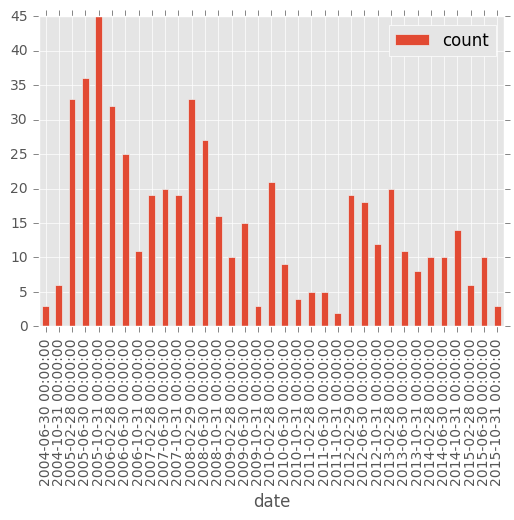

In [28]:
u[['count','date']].set_index("date").resample("4M").sum().plot(kind="bar")

In [32]:
u

,date,keep,Titre,Id,count
2,2004-06-30,2,Jean-Pierre Raffarin annonce une agence nationale,Figaro 2004-06-30 00:00:00,1
3,2004-06-30,1,Les promesses de Jean-Pierre Raffarin,Le Monde 2004-06-30 00:00:00,1
4,2004-06-30,1,Couacs autour de la recherche,Libération 2004-06-30 00:00:00,1
5,2004-07-10,1,Recherche : la réforme en ligne de mire,Figaro 2004-07-10 00:00:00,1
6,2004-09-23,1,Les tours de passe-passe du budget 2005,Libération 2004-09-23 00:00:00,1
7,2004-09-23,1,"François d'Aubert : « En trois ans, 6 milliards d'euros de plus »",Figaro 2004-09-23 00:00:00,1
8,2004-09-23,1,Le budget de la recherche en forte hausse,Figaro 2004-09-23 00:00:00,1
9,2004-09-23,1,Recherche : le milliard d'euros supplémentaire déçoit les chercheurs,Le Monde 2004-09-23 00:00:00,1
10,2004-09-24,1,RECHERCHE : un budget CONTESTÉ,Le Monde 2004-09-24 00:00:00,1
11,2004-11-01,1,Lueur d'espoir pour la recherche,Le Monde 2004-11-01 00:00:00,1


## Base de données issu d'un codage des articles de l'AEF

### Récupération des articles pour un traitement ultérieur

In [17]:
articles = []
con = sq.connect('anrpresse.db')
cur = con.cursor()
cur.execute('SELECT * FROM entries AS e JOIN text AS t ON e.id=t.id_article')
for i in cur:
    articles.append([i[0],i[2],i[3],i[6],i[-1]])
con.close()

In [3]:
len(articles)

1463

Uniquement les articles jugés liés au sujet car il y en a beaucoup

In [536]:
articles_filtred=[i for i in articles if i[-2]!="Faible"]
print(len(articles_filtred))

336


In [30]:
articles = articles_filtred
pd.options.display.max_colwidth=150
corpus = pd.DataFrame(articles, columns = ["Id","Titre","Date","Type","Contenu"])
corpus.Date = corpus.Date.map(lambda x: datetime.strptime(x,"%Y/%m/%d"))
corpus.Contenu = corpus.Contenu.map(lambda x: x.replace("\t"," "))
corpus = corpus[(corpus['Date'] < '2015-01-01')]
corpus.sort("Date")[-10:]

,Id,Titre,Date,Type,Contenu
324,3134,Le futur président de l'ANR cumulera les fonctions de président et de directeur général,2014-03-25,Forte,"\n Le futur président de l'ANR (Agence nationale de la recherche), pour lequel un ""appel à candidatures"" a été lancé le 19 mars 2014 ( lire su..."
326,3136,"Bilan de G. Fioraso : un ""État stratège"" conforté par la loi, le ""recentrage"" de l'ANR et le rôle accru des alliances",2014-04-02,Moyenne,"\n Geneviève Fioraso, ancienne ministre de l'Enseignement supérieur et de la Recherche © Bruno Moyen Nommée ministre de l'Enseignement s..."
327,3138,"Pascale Briand : ""En moyens humains, l'ANR est dans une situation extrêmement tendue à l'aube du PIA 2""",2014-04-18,Forte,"\n Pascale Briand, directrice générale de l'ANR. © ANR Parmi les différents opérateurs des investissements davenir, ""lANR sest vu confie..."
328,3143,Les crédits de l'ANR pour 2013 ont été réduits de 26 % par rapport à la loi de finances initiale (Cour des comptes),2014-05-28,Moyenne,"\n Dotée de 25,94 Md de crédits de paiement votés en loi de finances initiale 2013, la Mires fait partie des priorités budgétaires du gouverne..."
329,3156,"Alain Fuchs : ""Le CNRS a fait le choix des Satt et fait le maximum pour que ça marche""",2014-06-30,Moyenne,\n Les points abordés par Alain Fuchs Ne pas faire le procès des Satt avant quelles naient fait leurs preuves Les investissements daven...
330,3162,"Appel à projets générique 2014 de lANR : 300 M pour 711 projets retenus, soit un taux de sélection de 28 %",2014-07-18,Forte,\n La première phase du nouveau processus de sélection en deux temps des projets de recherche soumis à l ANR avait abouti en mars dernier à r...
331,3164,"""Sciences en marche"" demande un triplement des dotations de base des laboratoires en redéployant 10 % du CIR",2014-08-19,Moyenne,"\n ""Au-delà de la communication officielle qui prétend 'sanctuariser la recherche', la combinaison du très faible niveau de financement par do..."
332,3167,"Geneviève Fioraso : ""Nous allons remettre à plat la méthode"" de sélection des projets de lANR",2014-09-11,Moyenne,"\n ""Lors des assises de lenseignement supérieur et de la recherche, il avait été demandé dinstaurer un processus de sélection en deux temps po..."
333,3168,"G. Fioraso à AEF : ""Le budget de la recherche est constant et 2015 ne sera pas une année blanche pour les recrutements""",2014-09-25,Moyenne,\n AEF : Le budget et les effectifs de la recherche vont-ils diminuer lannée prochaine ? Geneviève Fioraso : Je veux maintenir lemploi sc...
334,3174,"L'Académie des sciences propose qu'une partie du crédit impôt recherche aille vers les ""besoins réels des laboratoires""",2014-10-08,Moyenne,"\n LAcadémie des sciences ""rappelle la nécessité impérieuse du maintien dune recherche fondamentale de haut niveau en France, recherche souven..."


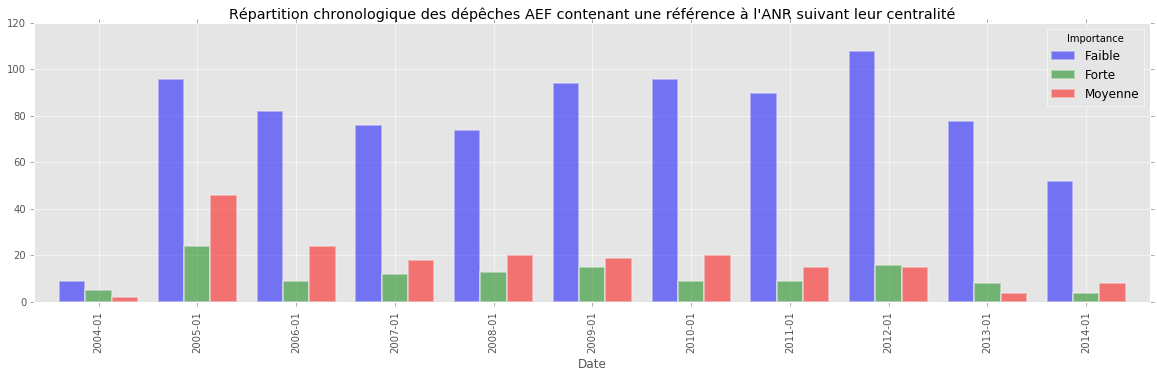

In [110]:
aef = pd.DataFrame(corpus.Date)
aef["Importance"] = corpus.Type
aef["num"]=1
b = pd.pivot_table(aef, values='num', index=['Date'], columns=['Importance']).resample("AS",how="sum")
ax = b.plot(kind="bar",lw=2,figsize=(20,5),alpha=0.5,width=0.8)
ax.set_xticklabels([dt.strftime('%Y-%m') for dt in b.index])
plt.title("Répartition chronologique des dépêches AEF contenant une référence à l'ANR suivant leur centralité")
plt.savefig("aef-evo.png",dpi=300)

### Sortie des titres pour lecture 

In [170]:
exit = corpus.reindex(columns=["Id","Date","Titre","Type"])
exit["keep"] = 1
exit.to_csv("articles-aef.csv",sep=";")

### Analyse des acteurs présents

In [258]:
entities = pd.read_csv("aef-anr-ac.csv",sep=";", encoding = "ISO-8859-1")

In [259]:
actants = {}
for i,j in entities.iterrows():
    if not j["abg.1"] in actants:
        actants[j["abg.1"]] = [j["abg"]]
    else:
        actants[j["abg.1"]].append(j["abg"])

In [330]:
actants["pres"]

[' pres ']

In [396]:
def detect(oc,t):
    c = 0
    for i in oc:
        if i in t:
            c=1
    return c

def count(m, tous = False):
    if tous:
        return corpus["Contenu"].apply(lambda x: detect(actants[m],x.lower())).sum()
    else:
        return corpus[corpus["Type"]!="Faible"]["Contenu"].apply(lambda x: detect(actants[m],x.lower())).sum()
c = {i:count(i) for i in actants}

In [277]:
u = sorted([(c[i],i) for i in c if str(i)!="nan"],reverse=True)

In [537]:
#for v in u[0:21]:
#    print("&"+str(v[1])+"&"+str(v[0])+"//")
u

'no-anr'

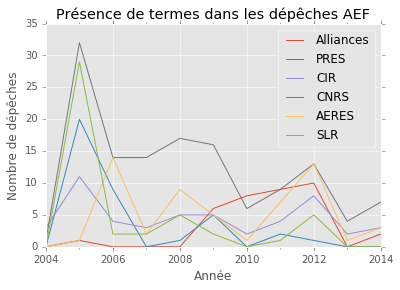

In [346]:
t = corpus.set_index("Date")
t[t["Type"]!="Faible"]["Contenu"].apply(lambda x: detect(actants["alliance"],x.lower())).resample("A",how="sum").plot()
t[t["Type"]!="Faible"]["Contenu"].apply(lambda x: detect(actants["pres"],x.lower())).resample("A",how="sum").plot()
t[t["Type"]!="Faible"]["Contenu"].apply(lambda x: detect(actants["cir"],x.lower())).resample("A",how="sum").plot()
t[t["Type"]!="Faible"]["Contenu"].apply(lambda x: detect(actants["cnrs"],x.lower())).resample("A",how="sum").plot()
t[t["Type"]!="Faible"]["Contenu"].apply(lambda x: detect(actants["aeres"],x.lower())).resample("A",how="sum").plot()
t[t["Type"]!="Faible"]["Contenu"].apply(lambda x: detect(actants["slr"],x.lower())).resample("A",how="sum").plot()
plt.legend(["Alliances","PRES","CIR","CNRS","AERES","SLR"])
plt.title("Présence de termes dans les dépêches AEF")
plt.xlabel("Année")
plt.ylabel("Nombre de dépêches")
plt.savefig("aef-evo-termes.png",dpi=300)

## Création du réseau

In [397]:
def findactants(c):
    a = []
    for i in actants:
        if detect(actants[i],str(c["Contenu"]).lower()) == 1:
            a.append(i)
    return a

d = []
for i,j in t[t["Type"]!="Faible"].iterrows():
    d.append((i,findactants(j)))
    

In [398]:
G=nx.Graph()
for i in d:
    for j in i[1]:
        if not j in G.node:
            G.add_node(j,label=j,weight=0.0)
        G.node[j]["weight"]+=1
    for j in range(0,len(i[1])):
        for k in range(j+1,len(i[1])):
            try:
                G.edge[i[1][j]][i[1][k]]["weight"]+=1
            except:
                G.add_edge(i[1][j],i[1][k],weight=1)              
nx.write_graphml(G, "reseau-aef-all.graphml")

In [414]:
v = nx.betweenness_centrality(G)
[(v[i],i) for i in v if v[i]>0.01]

[(0.011867157939585095, 'premier ministre'),
 (0.01577971374976178, 'recherche fondamentale'),
 (0.01727017115762298, 'cir'),
 (0.01719058321349322, 'alliance'),
 (0.015891689372986746, 'biologie'),
 (0.013293153050515982, 'cea'),
 (0.016635086697247187, 'epst'),
 (0.01112537806357136, 'syndicat'),
 (0.01119673375715584, 'cpu'),
 (0.015745227752987156, 'slr'),
 (0.01769583323396249, 'europe'),
 (0.02139105239856261, 'aeres'),
 (0.010334409648886872, 'jacqueline lecourtier'),
 (0.01998528081423625, 'pme'),
 (0.06181048812743438, 'innovation'),
 (0.011293135201772372, 'industriels'),
 (0.06607647117840472, 'entreprises'),
 (0.010578136790642824, 'cour des comptes'),
 (0.021973863722537502, 'doctorat'),
 (0.013673681739164407, 'inra'),
 (0.0120559939946394, 'cdd'),
 (0.021910982486174402, 'inserm'),
 (0.04920651135448176, 'nsf'),
 (0.014409619061870474, 'le gouvernement'),
 (0.06763389230821802, 'cnrs')]

# Traitement des données de la presse Europresse

### Définition d'un parseur europresse

In [126]:
class EuroPresse(object):
    def __init__(self,directory=None, label="None"):
        self.label = label
        self.corpus = []
        locale.setlocale(locale.LC_ALL, "fr_FR.UTF-8")
        if directory != None:
            files = glob.glob(directory+"/*.html")
            for f in files:
                self.corpus += self.parse(f)
            
    def parse(self,html):
        articles  = []
        d = ""
        with open(html,"r") as f:
            d = f.readlines()
        d = "".join(d).replace("\n","")
        soup = bs.BeautifulSoup(d)
        for i in soup.findAll("article"):
            a = {}
            a["all"] = i
            a["label"] = self.label
            try:
                a["title"] = i.findAll("p", { "class" : "titreArticleVisu" })[0].text
            except:
                a["title"] = "NA"
            try:
                a["content"] = i.findAll("div", { "class" : "docOcurrContainer" })[0].text
            except:
                a["title"] = "NA"
            try:
                a["date"] = self.extract_date(i.findAll("span", { "class" : "DocHeader" })[0].text)
            except:
                a["date"] = "NaN"
                print(i.findAll("span", { "class" : "DocHeader" })[0].text)
            articles.append(a)
        return articles

    def extract_date(self,header):
        if len(header.split(","))>=3:
            u = " ".join(header.split(",")[1].strip().split(" ")[1:])
        else:
            u = " ".join(header.split(",")[0].strip().split(" ")[1:])
        return datetime.strptime(u, '%d %B %Y')


### Création d'une BDD à partir des fichiers HTML

RECUPERER LES FICHIERS SUR UN AUTRE ORDINATEUR

In [143]:
figaro = EuroPresse("./Europresse/anr_figaro/",label="Figaro")
lemonde = EuroPresse("./Europresse/anr_lemonde//",label="Le Monde")
liberation = EuroPresse("./Europresse/anr_liberation//",label="Libération")

Le Figaro, vendredi 30 mars 2012


In [202]:
corpus = figaro.corpus + lemonde.corpus  + liberation.corpus
corpus = [[i["date"],i["label"],i["title"],i["content"]] for i in corpus]
corpus = pd.DataFrame(corpus).dropna().sort(0)
corpus.columns = ['Date','Journal', 'Titre',"Contenu"]
corpus["Id"] =   corpus["Date"].map(lambda x : x.strftime('%Y%m%d')) + " " + corpus["Journal"]
corpus = corpus.set_index("Id")
corpus[0:10]

,Date,Journal,Titre,Contenu
Id,,,,
20040308 Figaro,2004-03-08,Figaro,Eurazeo confirme son virage stratégique,On ne pourra plus évoquer « les holdings de l...
20040312 Le Monde,2004-03-12,Le Monde,Le CNRS lance un projet de rénovation de ses s...,LE PRÉSIDENT du Centre national de la recherc...
20040630 Figaro,2004-06-30,Figaro,Jean-Pierre Raffarin annonce une agence nationale,Alors que les premières propositions de réfor...
20040630 Le Monde,2004-06-30,Le Monde,Les promesses de Jean-Pierre Raffarin,La revendication de 1 milliard d'euros supplé...
20040630 Libération,2004-06-30,Libération,Couacs autour de la recherche,"Jean-Pierre Raffarin a annoncé hier, sur Euro..."
20040710 Figaro,2004-07-10,Figaro,Recherche : la réforme en ligne de mire,Les dernières propositions pour la nouvelle l...
20040923 Libération,2004-09-23,Libération,Les tours de passe-passe du budget 2005,Nicolas Sarkozy a présenté hier devant le Con...
20040923 Figaro,2004-09-23,Figaro,"François d'Aubert : « En trois ans, 6 milliard...",LE FIGARO. Le projet de budget 2005 répond-t-...
20040923 Figaro,2004-09-23,Figaro,Le budget de la recherche en forte hausse,Le gouvernement Raffarin a tenu ses engagemen...


### Nettoyage

Le nettoyage se fait à la main en mettant à keep à 0 les articles à enlever dans le fichier. Renommer en -net


Pour plus de facilité, seul le titre est affiché, l'id permettant de vérifier à ma main le contenu de certains articles

In [193]:
exit = corpus.reindex(columns=["keep","Titre","Id"])
exit["keep"] = 1
exit.to_csv("articles-presse.csv",sep=";")

### récupération du fichier nettoyé

In [124]:
entry = pd.read_csv("articles-presse-net.csv",sep=";")
entry = entry.set_index("Id")
corpus = corpus.merge(entry)
corpus = corpus[corpus['keep']>0]

In [125]:
entry

,Id,Date,Type,Contenu,date,keep,Titre


In [118]:
a = pd.DataFrame(corpus.Date)
a["num"] = 1
a["Journal"] = corpus.Journal
#a = a.set_index("Date")


AttributeError: 'DataFrame' object has no attribute 'Journal'

ok


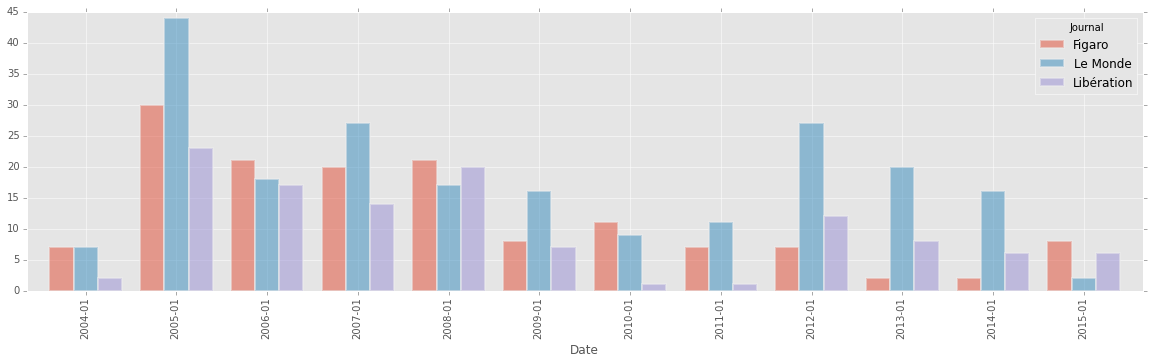

In [301]:
b = pd.pivot_table(a, values='num', index=['Date'], columns=['Journal']).resample("AS",how="sum")
ax = b.plot(kind="bar",lw=2,figsize=(20,5),alpha=0.5,width=0.8)
ax.set_xticklabels([dt.strftime('%Y-%m') for dt in b.index])
plt.title("Répartition chronologique des dépêches AEF contenant une référence à l'ANR suivant leur centralité")
plt.savefig("presse-evo.png",dpi=300)

In [415]:
with open("ira-anr-lemonde.txt","w") as f:
    for i in a.corpus:
        f.write("**** *year_"+str(i["date"].year)+"\n"+i["content"].replace("*"," ")+"\n\n")

AttributeError: 'DataFrame' object has no attribute 'corpus'

# Analyse des données des Assises

In [33]:
def clean(x):
    x = x.replace("e╠ü","é")
    x = x.replace("e╠Ç","è")
    x = x.replace("a╠Ç","à")
    x = x.replace("E╠ü","é")
    x = x.replace("ÔÇÖ","'")
    x = x.replace("o╠é","ô")
    x = x.replace("c╠º","c")
    x = x.replace("e╠ê","ë")
    x = x.replace("e╠é","ê")
    x = x.replace("I╠é","I")
    x = x.replace("i╠ê","ï")
    x = x.replace("i╠é","î")
    return x.replace(".htm","")
        

data = {}
l = os.listdir("../data/Assises.html")
for i in l:
    with open("../data/Assises.html/"+i) as f:
        u = bs.BeautifulSoup(f,"lxml")
        data[clean(i)] = u
print(len(data))
        
#Filtre sur la taille
for i in [i for i in data if len(data[i].text)>200000]:
    del data[i]

1280


## Sous ensemble ANR

In [34]:
sb = [(data[i].text.lower().count("anr")/len(data[i].text.split(" ")),data[i].text.lower().count("anr"),i) for i in data if "anr" in data[i].text.lower()]

In [35]:
print(len(sb))

389


In [36]:
sb2 = [ i for i in data if "anr" in data[i].text.lower() and ("supprimer" in data[i].text.lower() or "suppression" in data[i].text.lower())]

In [37]:
print(len(sb2))

135


In [549]:
data[sb2[10]]

<html><body><p>﻿<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

</p><meta content="text/html; charset=utf-8" http-equiv="content-type"/><meta content="ABBYY FineReader OCR Pro" name="generator"/><meta content="Assises ESR" name="author"/><title>20121018AssisesPropositions Conseil Régional Aquitaine</title>
<p>Soutien inconditionnel aux textes SLR, SLU, C3N, Slow science et les organisations syndicales. Mais aussi quelques idées pour aller de l’avant et à débattre</p>
<p>Vérité et Qualité au coeur de la recherche I Un constat : Une société de la pensée unique IA-Favoriser la diversité des modes de pensée:</p>
<p>La richesse d’un pays tient de la diversité des individus qui le composent (c'est comme la biodiversité, cela doit être préservé), de la diversité des professions, des parcours, diversité des modes de pensée. Tout ce qui peut conduire vers une pensée unique est à banir. Le monde est complexe , l’université rend compte de cet

In [546]:
sb2[1]

(0.00044583147570218456,
 1,
 '997-Association des Sociologues Enseignants du Supérieur (ASES)')

In [472]:
print(len(sb))

389


In [539]:
sorted(sb,reverse=True)[0:5]

[(0.01606425702811245, 4, '1218-Thierry Goudon'),
 (0.014634146341463415, 3, '1080-Philippe Sansonnetti'),
 (0.013358778625954198, 7, '1221-Stéphane Martin'),
 (0.01276595744680851, 24, '313-Département INRA - Génétique Animale'),
 (0.012714558169103624, 20, '1133-Franck Ramus')]

In [476]:
print(data['1221-Stéphane Martin'].text)

﻿
20121018AssisesPropositions Conseil Régional Aquitaine
Agir pour la réussite de tous les étudiants / Donner une nouvelle ambition pour la recherche
Suppression immédiate des strates administratives inutiles : ITMO/AVIESAN/FIST/SATT... Ceci réduira les coûts administratifs associés.
Evaluation AERES :
Retour de l'évaluation des équipes et des Centres de Recherche par les tutelles avec un contrôle de la qualité des critères d'évaluation par l'AERES. Ceci réduira fortement les frais de fonctionnement de l'AERES.
Financements ANR - LabEx/IDEX... :
Disparition des LabEx/ldex... avec retour des financements vers l'ANR pour augmenter le taux de succès aux ANR à plus de 20% notamment dans le programme blanc. Financements ANR pour la recherche et non pas pour les PME !
Thématique des appels à projets définies par les tutelles et non par l'ANR, qui garderait l'aspect organisationnel de ces appels d'offres. Les montants versés par l'ANR pour un projet doivent être plus importants et non systéma

## Création d'un fichier Iramuteq

In [439]:
with open("itamuteq-assises.txt","w") as f:
    t = {i[1]:i[0] for i in sb}
    for i in data:
        if i in t:
            if t[i]>3:
                u = "anr+"
            else:
                u = "anr"
        else:
            u = "no-anr"
        f.write("**** *"+u+"\n\n"+data[i].text+"\n\n")
        
with open("itamuteq-assises-anr.txt","w") as f:
    for i in sb:
        f.write("**** *"+i[1].replace(" ",".")+"\n\n"+data[i[1]].text+"\n\n")

### Analyse des données de SEM

In [33]:
len([i for i in data if "université" in data[i].text.lower()])

1095

In [35]:
max([len(data[i].text) for i in data])

455218

In [40]:
len(data)

1279

## Codage des données des Assises

In [40]:
f = pd.read_excel("../data/assises-anr-codage.xls")

In [41]:
f.columns

Index(['fichier', 'contributeur', 'type de contribution', 'domaine',
       'thème de la contribution', 'propos', 'citation', 'positif/négatif',
       'direct/indirect'],
      dtype='object')

In [42]:
len(set(f["contributeur"]))

246

In [44]:
def code(x):
    try:
        if "neg" in x:
            return "neg"
        if "pos" in x:
            return "pos"
        return "neutre"
    except:
        return "neutre"
f["jugement"] = f["positif/négatif"].apply(lambda x: code(x))

def code(x):
    try:
        if "oui" in x:
            return "direct"
        if "non" in x:
            return "indirect"
        return x
    except:
        return "indirect"
f["direct"] = f["direct/indirect"].apply(lambda x: code(x))

def code(x):
    try:
        if "récurrent" in x:
            return "récurrent/compétitif"
        if "outil" in x:
            return "outils"
        if "procédure" in x:
            return "procédures ANR"
        if x in ["ANR","disparités","évaluation","PPP","international","impact","evaluation","avenir de l'ANR","université"]:
            return "Autre"
        return x
    except:
        return "indirect"
f["contribution"] = f["thème de la contribution"].apply(lambda x: code(x))

In [45]:
pd.crosstab(f["jugement"],f["direct"],margins=True)

direct,direct,indirect,All
jugement,,,
neg,330,139,469
neutre,68,33,101
pos,78,14,92
All,476,186,662


In [49]:
l = {}
for i,j in f.set_index("contributeur").iterrows():
    if i in l:
        l[i].append(j["jugement"])
    else:
        l[i] = [j["jugement"]]
print(len(l))
print(len([i for i in l if not "pos" in l[i]]))
print(len([i for i in l if not "neg" in l[i]]))
print(len([i for i in l if not "neg" in l[i] and not "pos" in l[i]] ))

246
187
50
29


In [48]:
len(l)

262

In [4]:
f["contribution"].value_counts()

KeyError: 'contribution'

In [520]:
pd.crosstab(f["contribution"],f["jugement"]).apply(lambda r: 100.0*r/r.sum(), axis=1)

jugement,neg,neutre,pos
contribution,,,
Autre,63.157895,10.526316,26.315789
outils,43.750000,30.357143,25.892857
procédures ANR,88.000000,8.000000,4.000000
programmation,63.793103,22.413793,13.793103
précarité,95.238095,4.761905,0.000000
récurrent/compétitif,80.172414,12.931034,6.896552
structuration du SFRI,65.168539,16.853933,17.977528


In [466]:
f[f["jugement"]=="pos"]

,fichier,contributeur,type de contribution,domaine,thème de la contribution,propos,citation,positif/négatif,direct/indirect,jugement
7,contribution_INRA,INRA,EPST,SHS,structuration du SFRI,l'ANR reste en place,"l’ANR conservant un rôle d’agence de financement sur projets, sa programmation devant être arrêtée en concertation étroite avec les alliances",positif,direct,pos
10,ContributionINRA-CEPIA,INRIA CEPIA,EPST,informatique,programmation,par les instituts et organismes,financement par des agences publiques de moyens sur programmation des instituts ou universités pour conserver la main sur les questions de recherche et permettre une valorisation des résultats plus libre et plus rapide,positif,indirect,pos
11,ContributionINRA-CEPIA,INRIA CEPIA,EPST,informatique,structuration du SFRI,place des agences,financement par des agences publiques de moyens sur programmation des instituts ou universités pour conserver la main sur les questions de recherche et permettre une valorisation des résultats plus libre et plus rapide,positif,indirect,pos
13,ContributionINRA-CSDSPE,Département SPE INRA,EPST,biologie végétale,récurrent/compétitif,hygiène des AAP,"il y a des vertus à répondre à des AAP (pour l’innovation, pour la connexion à des questions sociales, pour la pluridisciplinarité). Le problème n’est donc pas l’existence d’AAP, mais plutôt le taux de pression",positif,indirect,pos
14,ContributionINRA-CSDSPE,Département SPE INRA,EPST,biologie végétale,procédures ANR,taux de sélection trop bas,"il y a des vertus à répondre à des AAP (pour l’innovation, pour la connexion à des questions sociales, pour la pluridisciplinarité). Le problème n’est donc pas l’existence d’AAP, mais plutôt le taux de pression",positif,indirect,pos
25,ContributionINRA-EFPA,Département EFPA INRA,EPST,écologie,récurrent/compétitif,une amélioration,"Globalement, il y a plus de moyens mais l’acquisition de ces moyens est plus lourd",positif,indirect,pos
26,ContributionINRA-EFPA,Département EFPA INRA,EPST,écologie,procédures ANR,lourdeur des procédures,"Globalement, il y a plus de moyens mais l’acquisition de ces moyens est plus lourd",positif,indirect,pos
32,ContributionINRA-MICA,Département MICA INRA,EPST,microbiologie,récurrent/compétitif,ration blanc/thématique apprécié,Le ratio actuel des appels à projets ANR : 50% AAP Blancs et jeunes chercheurs / 50% AAP thématiques est apprécié et doit être conservé.,positif,direct,pos
36,ContributionINRA-SA,Département SA INRA,EPST,santé animale,structuration du SFRI,intérêt de l'ANR reconnu,"Globalement, l’intérêt de disposer de l’ANR est reconnu",positif,direct,pos
48,Contribution_Institut-Mines-Telecom_Assises-ESR,Mines Telecom,Ecole,ingénieur,PPP,importance des structures encourageant le PPP,"les liens étroits entre la recherche publique et les entreprises sont essentiels, ainsi que tout ce qui encourage ces partenariats. On peut citer par exemple les Instituts Carnot, les programmes coopératifs de l’ANR, les pôles de compétitivité et les programmes des collectivités locales.",positif,indirect,pos


In [521]:
f["propos"]

0                      inadapté à l'interdisciplinarité
1                      inadapté à l'interdisciplinarité
2        indapaté aux infrastructures de données en SHS
3                                         part exessive
4          augmentation du reporting et de l'évaluation
5                           plus de poids des Alliances
6                                    règles budgétaires
7                                  l'ANR reste en place
8                                   place des alliances
9                                            simplifier
10                      par les instituts et organismes
11                                    place des agences
12                           taux de sélection trop bas
13                                      hygiène des AAP
14                           taux de sélection trop bas
15                              transfert ANR vers EPST
16                       manque d'efficacité du système
17                   perte de temps pour les che

## Sciences en marche

In [2]:
sem = pd.read_excel("../data/sem-enquete.xls")
sem["permanents"] = sem["Nbre approx chercheurs statutaires"]+sem['Nbre approx EC\xa0statutaires']

In [3]:
len(sem)

364

In [525]:
list(sem.columns)

['ID de la réponse',
 'Université',
 'CNRS',
 'Grande Ecole',
 'INSERM',
 'INRIA',
 'Hôpital',
 'INRA',
 'CEA',
 'IRD',
 'Grands Etablissements',
 'CIRAD',
 'ONERA',
 'CNES',
 'Tutelle(s) Autres',
 'Domaine de recherche principal (CNU)',
 'Domaine de recherche principal (grands domaines)',
 'Domaine de recherche secondaire',
 'Hébergement: Univ./GE',
 'Hébergement : Organismes de recherche',
 'Hébergement: Grands Etablissements',
 'Hébergement: Mixte',
 'Hébergement de la structure dans des locaux : [Autre]',
 'Localisation géographique de votre structure :',
 'Nombre total de personnels (statutaires, contractuels et stagiaires) en 2014 :',
 'Nbre approx doctorants',
 'Nbre approx post-doctorants',
 'Nbre approx ITs\xa0statutaires',
 'Nbre approx ITS contractuels',
 'Nbre approx admins statutaires ',
 'Nbre approx admins contractuels ',
 'Nbre approx chercheurs statutaires',
 'Nbre approx EC\xa0statutaires',
 'Votre structure peine-t-elle à recruter des doctorant-e-s ?',
 'Votre struct

In [11]:
pd.crosstab(sem['Domaine de recherche principal (grands domaines)'], sem["Quelle est la part des crédits de fonctionnement de votre structure (hors frais d'infrastructure -fluides, entretien du bâtiment - et achat de gros équipements (>20k€)) couverts par des crédits récurrents ?"])

"Quelle est la part des crédits de fonctionnement de votre structure (hors frais d'infrastructure -fluides, entretien du bâtiment - et achat de gros équipements (>20k€)) couverts par des crédits récurrents ?",11-30%,31-50%,51-70%,71-100%,Ne sait pas,≤10%
Domaine de recherche principal (grands domaines),,,,,,
"Arts, Architecture",1,0,0,0,0,0
Chimie,12,2,1,1,1,3
"Droit, éco et gestion",10,3,2,5,3,5
"Education, communication, sport",1,2,2,2,0,3
Littérature et langues,4,3,5,9,1,0
Maths/Info,11,3,4,5,4,9
Médecine/pharmacie,25,12,2,0,0,10
"Philo, psycho et théo",4,5,0,1,0,4
Physique,12,4,3,2,0,1


In [612]:
pd.crosstab(sem['Espoir Financements [Une augmentation des financements récurrents]'],sem["Espoir Financements [Une augmentation des financements sur projet]"])

Espoir Financements [Une augmentation des financements sur projet],important,pas important,peu important,prioritaire
Espoir Financements [Une augmentation des financements récurrents],,,,
important,40,4,15,46
pas important,1,0,0,0
peu important,12,0,2,16
prioritaire,96,17,59,56


In [626]:
sem['Considérez-vous que le niveau de de financement actuel de votre structure est internationalement compétitif ?'].value_counts()

assez compétitif          145
peu compétitif            132
pas du tout compétitif     60
très compétitif            27
dtype: int64

In [605]:
sem[sem[ "Commentaires budgets de fonctionnement de votre structure et son évolution. Place préconisée l'ANR et les PIAs dans le paysage français."].notnull()][ "Commentaires budgets de fonctionnement de votre structure et son évolution. Place préconisée l'ANR et les PIAs dans le paysage français."].to_csv("commentaires")

In [596]:
sem["Pensez-vous que l'ANR devrait être :"].value_counts()

Une agence de moyens complémentaires, permettant de financer des projets d'ampleur exceptionnelle, que les crédits récurrents ne suffisent pas à développer ?    155
Supprimée et ses moyens réaffectés aux organismes de recherche et aux universités ?                                                                              105
L'agence de financement qui fournit la majorité des financements de la recherche en France, analogue à la DFG en Allemagne, ou au Fonds National Suisse ?         70
dtype: int64

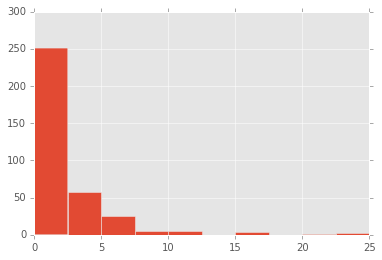

In [591]:
sem["Combien de demandes ont-elles été financées ?"].hist()